In [1]:
!pip install --upgrade pip
!pip install ibm-cos-sdk
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 91.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 166.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 157.4 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.13.3-py3-none-any.whl size=73918 sha256=4600387e917a0c4a0b0faef2fd5b6e0b75864035187750caaf4b0cd49cf99c1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ji75e8vv/wheels/9a/31/38/15c43b4a

In [2]:
from os import listdir
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.decomposition import PCA

In [3]:
# Print versions
!python --version
print('Numpy ' + np.__version__)
print('Pandas ' + pd.__version__)

Python 3.9.16
Numpy 1.24.4
Pandas 1.5.3


In [4]:
# Enable interactive matplotlib plots
#%matplotlib notebook
# use this if you are getting Javascript Error: IPython is not defined
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [5]:
dataset_path = 'ceiling-fan-dataset'  # Directory where raw accelerometer data is stored
normal_op_list = ['fan_0_low-deploy']
anomaly_op_list = ['fan_0_med_0_weight', 'fan_0_high_0_weight',
                  'fan_0_low_1_weight', 'fan_0_med_1_weight', 'fan_0_high_1_weight']

In [6]:
import os
import ibm_boto3
from ibm_botocore.client import Config, ClientError

# Constants for IBM COS values
COS_ENDPOINT = os.getenv('COS_ENDPOINT') # Current list avaiable at https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints
COS_API_KEY_ID = os.getenv('COS_API_KEY_ID') # eg "W00YixxxxxxxxxxMB-odB-2ySfTrFBIQQWanc--P3byk"
COS_INSTANCE_CRN = os.getenv('COS_INSTANCE_CRN') # eg "crn:v1:bluemix:public:cloud-object-storage:global:a/3bf0d9003xxxxxxxxxx1c3e97696b71c:d6f04d83-6c4f-4a62-a165-696756d63903::"
COS_AUTH_ENDPOINT = os.getenv('COS_AUTH_ENDPOINT') #eg "https://iam.cloud.ibm.com/identity/token"
REGION = os.getenv('REGION')
# Create resource
cos = ibm_boto3.resource("s3",
    ibm_api_key_id=COS_API_KEY_ID,
    ibm_service_instance_id=COS_INSTANCE_CRN,
    ibm_auth_endpoint=COS_AUTH_ENDPOINT,
    config=Config(signature_version="oauth"),
    endpoint_url=COS_ENDPOINT,
    region_name=REGION
)

total_list = normal_op_list + anomaly_op_list
if not os.path.exists('./' + dataset_path):
    for folder in total_list:
        os.makedirs(dataset_path + '/' + folder)


bucket = 'tead-bucket'

files = cos.Bucket(bucket).objects.all()
i = 0
displayerrors = 0
for file in files:
    #ceiling-fan/fan_0_low_0_weight/0171.csv
    sample = file.key.split("/")
    if len(sample) == 3:
        if sample[2].endswith('.csv'):
            print(sample[2])
            if sample[1] in total_list:
                local_file_name = file.key.replace("ceiling-fan", "ceiling-fan-dataset")
                try:
                    cos.meta.client.download_file(bucket, file.key, local_file_name)
                    i = i + 1
                    if i % 50 == 0:
                        print("Downloaded: ", format(i))
                except Exception as e:
                    if displayerrors:
                        print(Exception, e)

eu-de
0000.csv
0001.csv
0002.csv
0003.csv
0004.csv
0005.csv
0006.csv
0007.csv
0008.csv
0009.csv
0010.csv
0011.csv
0012.csv
0013.csv
0014.csv
0015.csv
0016.csv
0017.csv
0018.csv
0019.csv
0020.csv
0021.csv
0022.csv
0023.csv
0024.csv
0025.csv
0026.csv
0027.csv
0028.csv
0029.csv
0030.csv
0031.csv
0032.csv
0033.csv
0034.csv
0035.csv
0036.csv
0037.csv
0038.csv
0039.csv
0040.csv
0041.csv
0042.csv
0043.csv
0044.csv
0045.csv
0046.csv
0047.csv
0048.csv
0049.csv
0050.csv
0051.csv
0052.csv
0053.csv
0054.csv
0055.csv
0056.csv
0057.csv
0058.csv
0059.csv
0060.csv
0061.csv
0062.csv
0063.csv
0064.csv
0065.csv
0066.csv
0067.csv
0068.csv
0069.csv
0070.csv
0071.csv
0072.csv
0073.csv
0074.csv
0075.csv
0076.csv
0077.csv
0078.csv
0079.csv
0080.csv
0081.csv
0082.csv
0083.csv
0084.csv
0085.csv
0086.csv
0087.csv
0088.csv
0089.csv
0090.csv
0091.csv
0092.csv
0093.csv
0094.csv
0095.csv
0096.csv
0097.csv
0098.csv
0099.csv
0100.csv
0101.csv
0102.csv
0103.csv
0104.csv
0105.csv
0106.csv
0107.csv
0108.csv
0109.csv
0110

In [7]:
from os import listdir
from os.path import join

# Create list of filenames
def createFilenameList(op_list):
    
    # Extract paths and filenames in each directory
    op_filenames = []
    num_samples = 0
    for index, target in enumerate(op_list):
        samples_in_dir = listdir(join(dataset_path, target))
        samples_in_dir = [join(dataset_path, target, sample) for sample in samples_in_dir]
        op_filenames.append(samples_in_dir)
    
    # Flatten list
    return [item for sublist in op_filenames for item in sublist]

In [8]:
# Create normal and anomaly filename lists
normal_op_filenames = createFilenameList(normal_op_list)
anomaly_op_filenames = createFilenameList(anomaly_op_list)
print('Number of normal samples:', len(normal_op_filenames))
print('Number of anomaly samples:', len(anomaly_op_filenames))

Number of normal samples: 286
Number of anomaly samples: 2926


In [9]:
# Function to plot normal vs anomaly samples side-by-side
def plotTimeSeriesSample(normal_sample, anomaly_sample):
    fig, axs = plt.subplots(2, 1, figsize=(6, 6))
    fig.tight_layout(pad=3.0)
    axs[0].plot(normal_sample.T[0], label='x')
    axs[0].plot(normal_sample.T[1], label='y')
    axs[0].plot(normal_sample.T[2], label='z')
    axs[0].set_title('Normal sample')
    axs[0].set_xlabel('sample')
    axs[0].set_ylabel('G-force')
    axs[0].legend()
    axs[1].plot(anomaly_sample.T[0], label='x')
    axs[1].plot(anomaly_sample.T[1], label='y')
    axs[1].plot(anomaly_sample.T[2], label='z')
    axs[1].set_title('Anomaly sample')
    axs[1].set_xlabel('sample')
    axs[1].set_ylabel('G-force')
    axs[1].legend()

In [10]:
# Function to plot 3D scatterplot of normal and anomaly smaples
def plotScatterSamples(normal_samples, anomaly_samples, num_samples, title=''):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(num_samples):
        ax.scatter(normal_samples[i].T[0], normal_samples[i].T[1], normal_samples[i].T[2], c='b')
        ax.scatter(anomaly_samples[i].T[0], anomaly_samples[i].T[1], anomaly_samples[i].T[2], c='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)

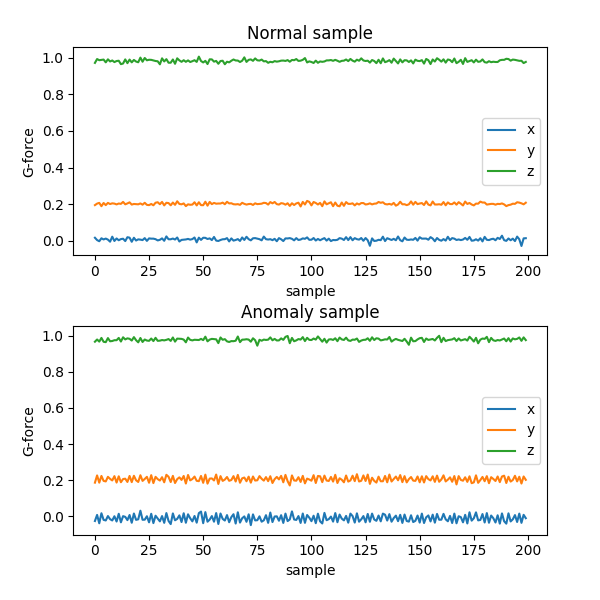

In [11]:
# Examine a normal sample vs anomalous sample
normal_sample = np.genfromtxt(normal_op_filenames[0], delimiter=',')
anomaly_sample = np.genfromtxt(anomaly_op_filenames[0], delimiter=',')

# Plot time series of accelerometer data
plotTimeSeriesSample(normal_sample, anomaly_sample)

In [12]:
!ipython --version

8.18.1


In [13]:
!pip uninstall ipywidgets -y

Found existing installation: ipywidgets 7.7.2
Uninstalling ipywidgets-7.7.2:
  Successfully uninstalled ipywidgets-7.7.2


In [14]:
!pip install --upgrade ipython

In [15]:
jupyterlab --version

NameError: name 'jupyterlab' is not defined

In [ ]:
!pip install ipywidgets==7.7.2